### AltSchool 2nd Semester Project

<img src="Screenshot 2024-03-13 115435.png" alt="description of the image" width="750" height="750" >


Hi Mr Gideon, so i read an article about 'Utilizing Pandas AI for Data Analysis', and i plan to experiment with it.(Link to article: https://www.kdnuggets.com/utilizing-pandas-ai-for-data-analysis)

Please review the notebook with a curious and discovery mindset(smiles)...also, i want to make a request for my first assignment to be reviwed.I'm not comfortable with the score i had(sad)...my admission number is student ID number: ALT/SOD/023/0871

In [ ]:
# Unfortunately, i wasn't able to get OpenAI API; therefore i couldn't load PandasAI into my enviroment(better luck next time i guess)

### 1.Introduction

ShopSmart Inc. is an e-commerce platform that sells a variety of products online. The company aims to optimize its website and enhance customer satisfaction by understanding customer behavior and preferences. To achieve this goal, ShopSmart Inc. plans to analyze the data collected from its website to gain insights into customer interactions, purchasing patterns, and product preferences.

Project Objective: The objective of this project is to utilize data from ShopSmart Inc.'s website to understand customer behavior and preferences. By analyzing the data, the company aims to:

1.     Segment customers based on their preferences, geographic location, and purchasing behavior.

2.     Enhance website usability and user experience based on insights gained from customer interactions.

3.     Optimize product offerings and marketing strategies to improve customer satisfaction and retention.

Data Sources:

The data for this project will be sourced from ShopSmart Inc.'s website and will include various attributes such as customer IDs, device IDs, transaction details, product information, and timestamps of customer interactions.

Methodology:

The project will involve data wrangling to preprocess the dataset, followed by exploratory data analysis (EDA) to uncover patterns and trends in customer behavior. Visualization techniques will be used to present the findings effectively.

Expected Outcome:

By understanding customer behavior and preferences, ShopSmart Inc. aims to optimize its website, product offerings, and marketing strategies to increase customer satisfaction, retention, and ultimately, revenue.

 

### 2.1 Libaries and Configurations

In [ ]:
"""import relevant libraries"""
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown, display # for markdown function

### 3.0 Data Wrangling

The first step of our analysis is to merge our data. We were provided with 5 datasets from different tables, our first task is to merge the datasets, clean and wrangle the dataset, engineer new features from event data. 

Step 1: Load dataset into Notebook Environment

In [ ]:
#Loading our datasets into DataFrame objects

customer_data = pd.read_csv("customers_data.csv")
event_data = pd.read_csv("events_data.csv")
orders_data = pd.read_csv("orders_data.csv")


Step 2: Merging Datasets.

Firstly, we will have to merge the first three datasets based on the ‘customer_id’ column which is common across all three.

In [ ]:
# Merge the datasets on 'customer_id'
merged_data = pd.merge(customer_data, event_data, on='customer_id')
merged_data = pd.merge(merged_data, orders_data, on='customer_id')

merged_data.head()

,customer_id,device_id,location,currency,event_id,event_data,event_timestamp,order_id,status,checked_out_at
0,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14753,"{""timestamp"": ""2024-03-21T12:47:11.012084"", ""e...",2024-03-21 12:47:11.012084,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413
1,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14754,"{""timestamp"": ""2024-03-27T11:35:50.208930"", ""e...",2024-03-27 11:35:50.208930,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413
2,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14755,"{""timestamp"": ""2024-03-30T04:03:10.392205"", ""e...",2024-03-30 04:03:10.392205,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413
3,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14756,"{""item_id"": 12, ""quantity"": 5, ""timestamp"": ""2...",2024-03-30 04:03:10.394393,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413
4,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14757,"{""item_id"": 11, ""quantity"": 1, ""timestamp"": ""2...",2024-03-30 04:03:10.394398,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413


Step 3: We merge the next two datasets with the first three above.

In [ ]:
# load dataset into notebook environment

products_data = pd.read_csv('products_data.csv')
line_items = pd.read_csv('line_items.csv')

# Merge 'product_data' and 'line_item' on 'id' and 'item_id' respectively
product_line_item = pd.merge(products_data, line_items, left_on='id', right_on='item_id')

# Merge the product/line item data with the previously merged data on 'order_id'
final_merged_data = pd.merge(merged_data, product_line_item, on='order_id')




In [ ]:
final_merged_data.head()

,customer_id,device_id,location,currency,event_id,event_data,event_timestamp,order_id,status,checked_out_at,id,name,price,line_item_id,item_id,quantity
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,4,Microsoft Xbox Series X,499.99,3201,4,2
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,5,Nike Air Max 270,129.99,3202,5,4
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,6,Adidas Ultraboost,180.00,3205,6,2
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,9,Nintendo Switch,299.99,3203,9,5
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,11,Canon EOS R5 Camera,3999.99,3206,11,4


Step 4: Cleaning and Wrangling Data

Handle missing values, duplicates, and correct data types in the final merged dataset.

In [ ]:
# Handling missing values
final_merged_data = final_merged_data.dropna()

# Removing duplicates
final_merged_data = final_merged_data.drop_duplicates()

# Correcting data types
final_merged_data['checked_out_at'] = pd.to_datetime(final_merged_data['checked_out_at'])

final_merged_data.head()


,customer_id,device_id,location,currency,event_id,event_data,event_timestamp,order_id,status,checked_out_at,id,name,price,line_item_id,item_id,quantity
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,4,Microsoft Xbox Series X,499.99,3201,4,2
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,5,Nike Air Max 270,129.99,3202,5,4
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,6,Adidas Ultraboost,180.00,3205,6,2
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,9,Nintendo Switch,299.99,3203,9,5
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,11,Canon EOS R5 Camera,3999.99,3206,11,4


### 3.1 Feature Engineering

Now, we create new features that could be useful for analysis, such as extracting time-related features from timestamps.

In [ ]:
# Feature Engineering
final_merged_data['checkout_weekday'] = final_merged_data['checked_out_at'].dt.weekday
final_merged_data['checkout_hour'] = final_merged_data['checked_out_at'].dt.hour

final_merged_data.head()

,customer_id,device_id,location,currency,event_id,event_data,event_timestamp,order_id,status,checked_out_at,id,name,price,line_item_id,item_id,quantity,checkout_weekday,checkout_hour
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,4,Microsoft Xbox Series X,499.99,3201,4,2,5,4
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,5,Nike Air Max 270,129.99,3202,5,4,5,4
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,6,Adidas Ultraboost,180.00,3205,6,2,5,4
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,9,Nintendo Switch,299.99,3203,9,5,5,4
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,11,Canon EOS R5 Camera,3999.99,3206,11,4,5,4


### 3.2 Checking Information of the New Dataset

In [ ]:
final_merged_data.head()

,customer_id,device_id,location,currency,event_id,event_data,event_timestamp,order_id,status,checked_out_at,id,name,price,line_item_id,item_id,quantity,checkout_weekday,checkout_hour
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,4,Microsoft Xbox Series X,499.99,3201,4,2,5,4
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,5,Nike Air Max 270,129.99,3202,5,4,5,4
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,6,Adidas Ultraboost,180.00,3205,6,2,5,4
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,9,Nintendo Switch,299.99,3203,9,5,5,4
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,11,Canon EOS R5 Camera,3999.99,3206,11,4,5,4


In [ ]:
final_merged_data.shape

(578320, 18)

In [12]:
final_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578320 entries, 0 to 578319
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   customer_id       578320 non-null  object        
 1   device_id         578320 non-null  object        
 2   location          578320 non-null  object        
 3   currency          578320 non-null  object        
 4   event_id          578320 non-null  int64         
 5   event_data        578320 non-null  object        
 6   event_timestamp   578320 non-null  object        
 7   order_id          578320 non-null  object        
 8   status            578320 non-null  object        
 9   checked_out_at    578320 non-null  datetime64[ns]
 10  id                578320 non-null  int64         
 11  name              578320 non-null  object        
 12  price             578320 non-null  float64       
 13  line_item_id      578320 non-null  int64         
 14  item

In [13]:
final_merged_data.describe()

,event_id,checked_out_at,id,price,line_item_id,item_id,quantity,checkout_weekday,checkout_hour
count,578320.000000,578320,578320.000000,578320.000000,578320.000000,578320.000000,578320.000000,578320.0,578320.0
mean,88235.379821,2024-03-30 04:13:21.897222400,7.995741,707.448609,19034.444880,7.995741,3.009861,5.0,4.0
min,14786.000000,2024-03-30 04:06:10.418189,1.000000,5.990000,3201.000000,1.000000,1.000000,5.0,4.0
25%,51318.000000,2024-03-30 04:09:18.190401024,4.000000,149.950000,11108.000000,4.000000,2.000000,5.0,4.0
50%,88373.000000,2024-03-30 04:13:14.665747968,8.000000,349.990000,19067.000000,8.000000,3.000000,5.0,4.0
75%,125003.000000,2024-03-30 04:17:14.312209920,12.000000,899.990000,26960.000000,12.000000,4.000000,5.0,4.0
max,161960.000000,2024-03-30 04:20:18.189028,15.000000,3999.990000,34941.000000,15.000000,5.000000,5.0,4.0
std,42541.874688,NaN,4.322902,972.915321,9153.541683,4.322902,1.406914,0.0,0.0


In [14]:
final_merged_data.columns

Index(['customer_id', 'device_id', 'location', 'currency', 'event_id',
       'event_data', 'event_timestamp', 'order_id', 'status', 'checked_out_at',
       'id', 'name', 'price', 'line_item_id', 'item_id', 'quantity',
       'checkout_weekday', 'checkout_hour'],
      dtype='object')

In [15]:
final_merged_data.values

array([['cda7bec0-7cbf-4145-baf9-e049bab94504',
        '33b485de-7338-4997-b1d0-b988ba17b245', 'Saint Helena', ..., 2,
        5, 4],
       ['cda7bec0-7cbf-4145-baf9-e049bab94504',
        '33b485de-7338-4997-b1d0-b988ba17b245', 'Saint Helena', ..., 4,
        5, 4],
       ['cda7bec0-7cbf-4145-baf9-e049bab94504',
        '33b485de-7338-4997-b1d0-b988ba17b245', 'Saint Helena', ..., 2,
        5, 4],
       ...,
       ['ef15a7b3-326c-405f-9eef-3dbf43c85a9d',
        '74bb4936-9890-421b-a62a-ee544191fa1e', 'Christmas Island', ...,
        3, 5, 4],
       ['ef15a7b3-326c-405f-9eef-3dbf43c85a9d',
        '74bb4936-9890-421b-a62a-ee544191fa1e', 'Christmas Island', ...,
        3, 5, 4],
       ['ef15a7b3-326c-405f-9eef-3dbf43c85a9d',
        '74bb4936-9890-421b-a62a-ee544191fa1e', 'Christmas Island', ...,
        3, 5, 4]], dtype=object)

In [16]:
type(final_merged_data)

pandas.core.frame.DataFrame

In [17]:
final_merged_data.index

RangeIndex(start=0, stop=578320, step=1)

In [18]:
final_merged_data.tail()

,customer_id,device_id,location,currency,event_id,event_data,event_timestamp,order_id,status,checked_out_at,id,name,price,line_item_id,item_id,quantity,checkout_weekday,checkout_hour
578315,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,Christmas Island,USD,161958,"{""item_id"": 1, ""quantity"": 3, ""timestamp"": ""20...",2024-03-30 04:03:18.224196,ad73a2a0-354a-40bf-81cd-ff017ac859d5,failed,2024-03-30 04:14:18.224200,4,Microsoft Xbox Series X,499.99,34940,4,3,5,4
578316,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,Christmas Island,USD,161959,"{""item_id"": 1, ""timestamp"": ""2024-03-30T04:03:...",2024-03-30 04:03:18.224198,ad73a2a0-354a-40bf-81cd-ff017ac859d5,failed,2024-03-30 04:14:18.224200,1,iPhone 13,1099.99,34941,1,3,5,4
578317,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,Christmas Island,USD,161959,"{""item_id"": 1, ""timestamp"": ""2024-03-30T04:03:...",2024-03-30 04:03:18.224198,ad73a2a0-354a-40bf-81cd-ff017ac859d5,failed,2024-03-30 04:14:18.224200,4,Microsoft Xbox Series X,499.99,34940,4,3,5,4
578318,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,Christmas Island,USD,161960,"{""status"": ""failed"", ""order_id"": ""ad73a2a0-354...",2024-03-30 04:14:18.224200,ad73a2a0-354a-40bf-81cd-ff017ac859d5,failed,2024-03-30 04:14:18.224200,1,iPhone 13,1099.99,34941,1,3,5,4
578319,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,Christmas Island,USD,161960,"{""status"": ""failed"", ""order_id"": ""ad73a2a0-354...",2024-03-30 04:14:18.224200,ad73a2a0-354a-40bf-81cd-ff017ac859d5,failed,2024-03-30 04:14:18.224200,4,Microsoft Xbox Series X,499.99,34940,4,3,5,4


### 4.0 Exploratory Data Analysis

We are going to perform EDA to understand the distributions, outliers, and patterns.

### 4.1 Using Histogram to show the distribution of the data

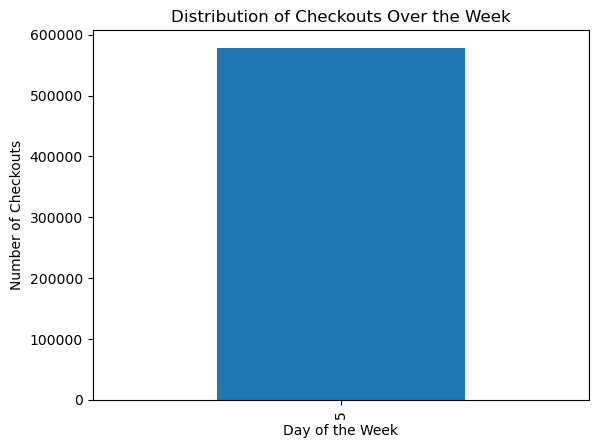

In [19]:

# Plotting the distribution of checkouts over days of the week
final_merged_data['checkout_weekday'].value_counts().plot(kind='bar')
plt.title('Distribution of Checkouts Over the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Checkouts')
plt.show()


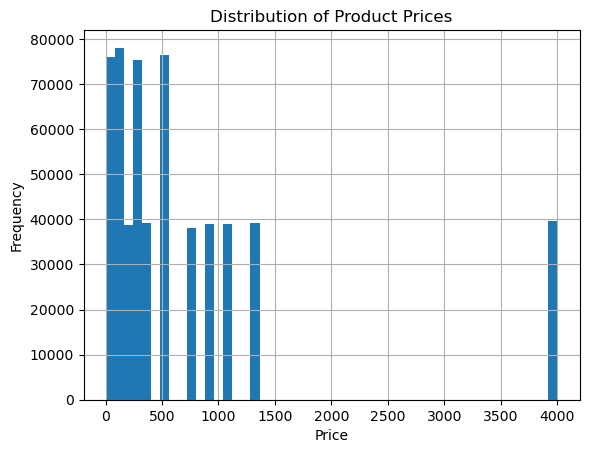

In [20]:
# Histogram of the 'price' column
final_merged_data['price'].hist(bins=50)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


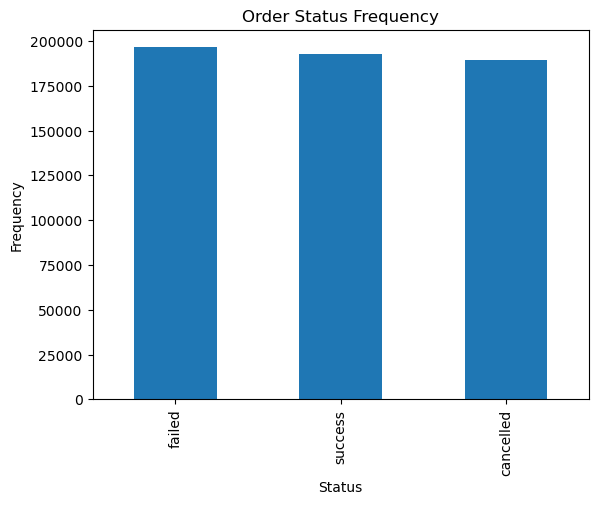

In [21]:
# Bar plot for 'status' column
final_merged_data['status'].value_counts().plot(kind='bar')
plt.title('Order Status Frequency')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.show()


c:\Users\Rodiyat\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1401: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


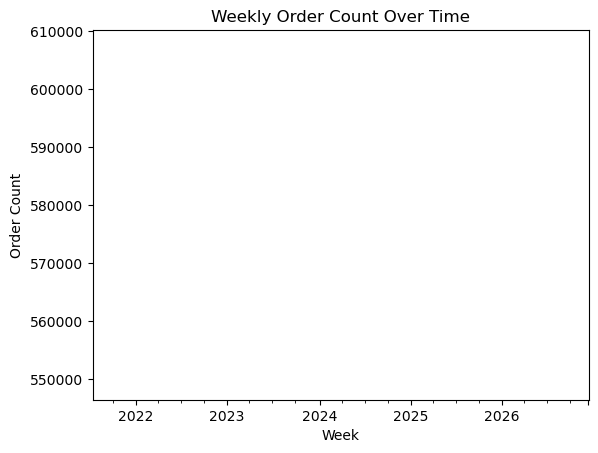

In [22]:
# Time series plot for order count over time
final_merged_data.set_index('checked_out_at')['order_id'].resample('W').count().plot()
plt.title('Weekly Order Count Over Time')
plt.xlabel('Week')
plt.ylabel('Order Count')
plt.show()


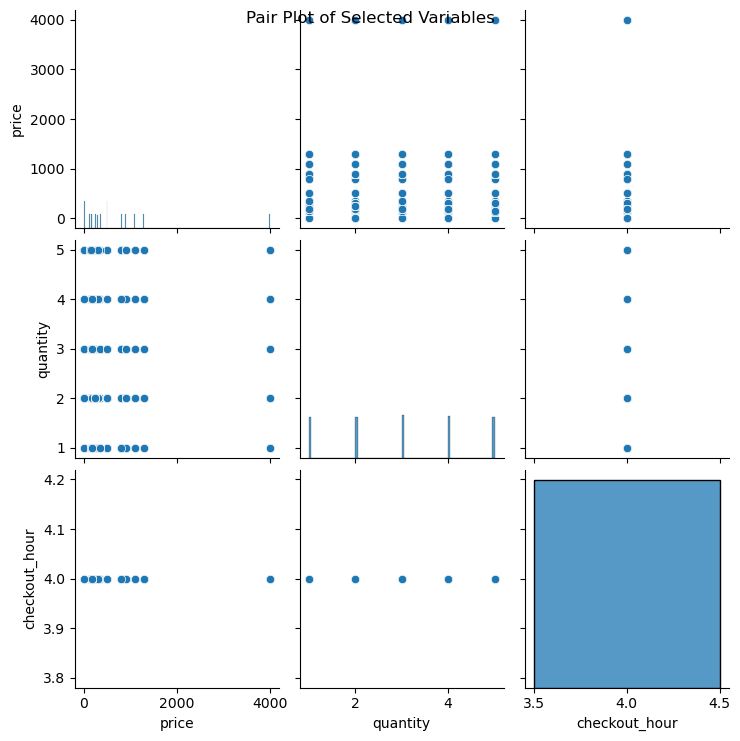

In [23]:
# Pair plot for a subset of variables
sns.pairplot(final_merged_data[['price', 'quantity', 'checkout_hour']])
plt.suptitle('Pair Plot of Selected Variables')
plt.show()


### 5.0 Interpretation of Data

### 5.1 a.     Visit Frequency:

How often does this customer visit the website, based on the provided data?

Can you identify any patterns or trends in the customer's visit frequency?

Step 1: Count Visits: Lets determine how many times each customer has visited by counting the number of events.

In [24]:
# Assuming 'customer_data' contains a record of each visit
visit_counts = customer_data['customer_id'].value_counts()

visit_counts


customer_id
4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf    1
bd7b5b22-176b-4b26-9108-a7e3a19f6e8d    1
be395a23-ed49-425e-84a6-22c0bfcc96d0    1
afe3c0ce-ae04-40a5-85db-d660cbf5f680    1
dd43ecfa-d02f-45bc-8083-fc374aeb0255    1
                                       ..
e185c1b8-4e05-4e03-afd5-9677837deec7    1
8e22cbf4-95fb-4518-b3e4-03ec60ed7b3a    1
54f3d208-6330-415c-8181-f24c20372751    1
a7fdd526-c9da-4d1e-9226-5e9a9b3d0897    1
ef15a7b3-326c-405f-9eef-3dbf43c85a9d    1
Name: count, Length: 10000, dtype: int64

Step 2: Lets create a simple plot to visualize the number of visits per customer.
This will help us gain valuable insights into how often customers visit the website and identify any clear patterns or trends in their visit frequency. This can also help us understand customer behavior better and make informed decisions for the business.

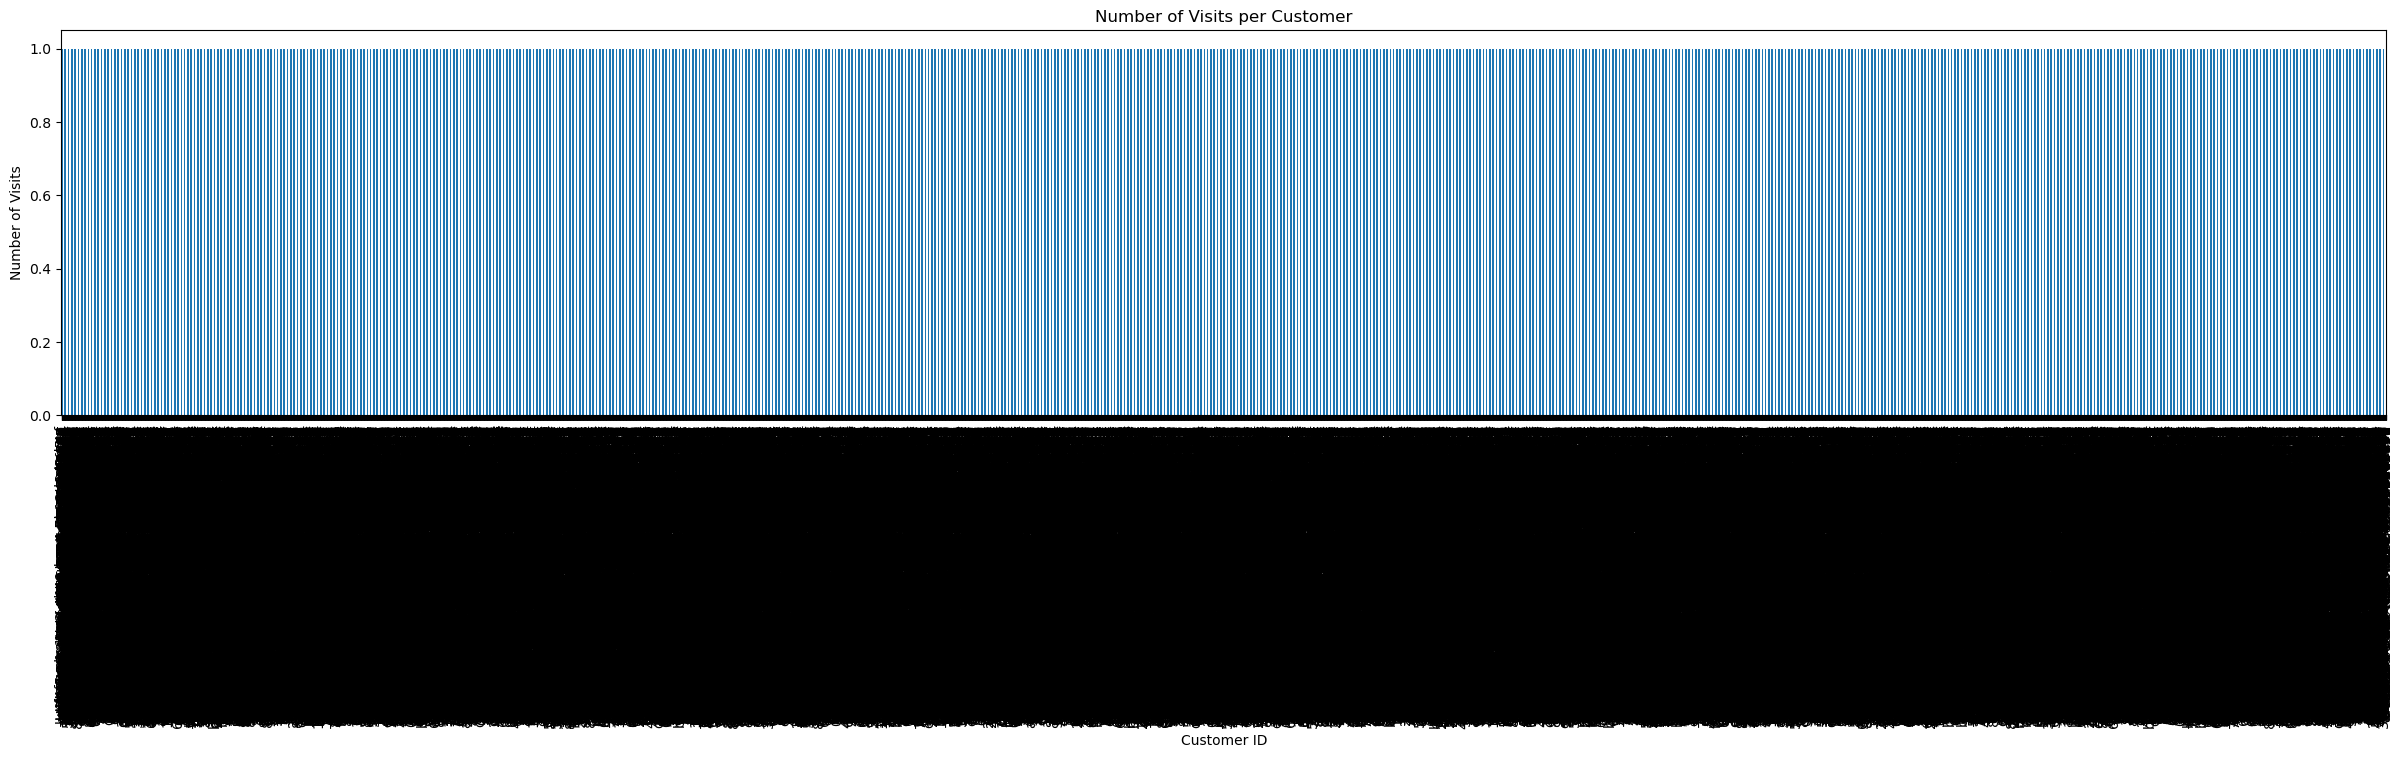

In [37]:
# Plotting the number of visits per customer
visit_counts.plot(kind='bar', figsize=(30, 5))
plt.title('Number of Visits per Customer')
plt.xlabel('Customer ID')
plt.ylabel('Number of Visits')
plt.show()


Step 3: What were the patterns we observed from the plot???



### 5.2 b.         Location Analysis:

What is the customer's location based on the provided data?

How might the customer's location influence their purchasing behavior?

In [ ]:
# Where are our customers from??? 

customer_locations = customer_data[['customer_id', 'location']]

customer_locations


,customer_id,location
0,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,Oman
1,5cc88463-6a08-48b5-977c-9683a1c607b2,United States of America
2,cda7bec0-7cbf-4145-baf9-e049bab94504,Saint Helena
3,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,Djibouti
4,873618f1-c201-4f8c-94bc-4cfc3d6d8cc8,Guinea-Bissau
...,...,...
9995,147e542b-6f10-4774-8b99-728376266c47,Denmark
9996,d66cf41b-bebb-45e0-ae69-664df9c45083,Liberia
9997,afeab1ad-fadb-4546-97cd-ea8ad8b6b774,Cuba
9998,3aa213f4-2699-43b4-96b8-bf0de1cda133,Liechtenstein


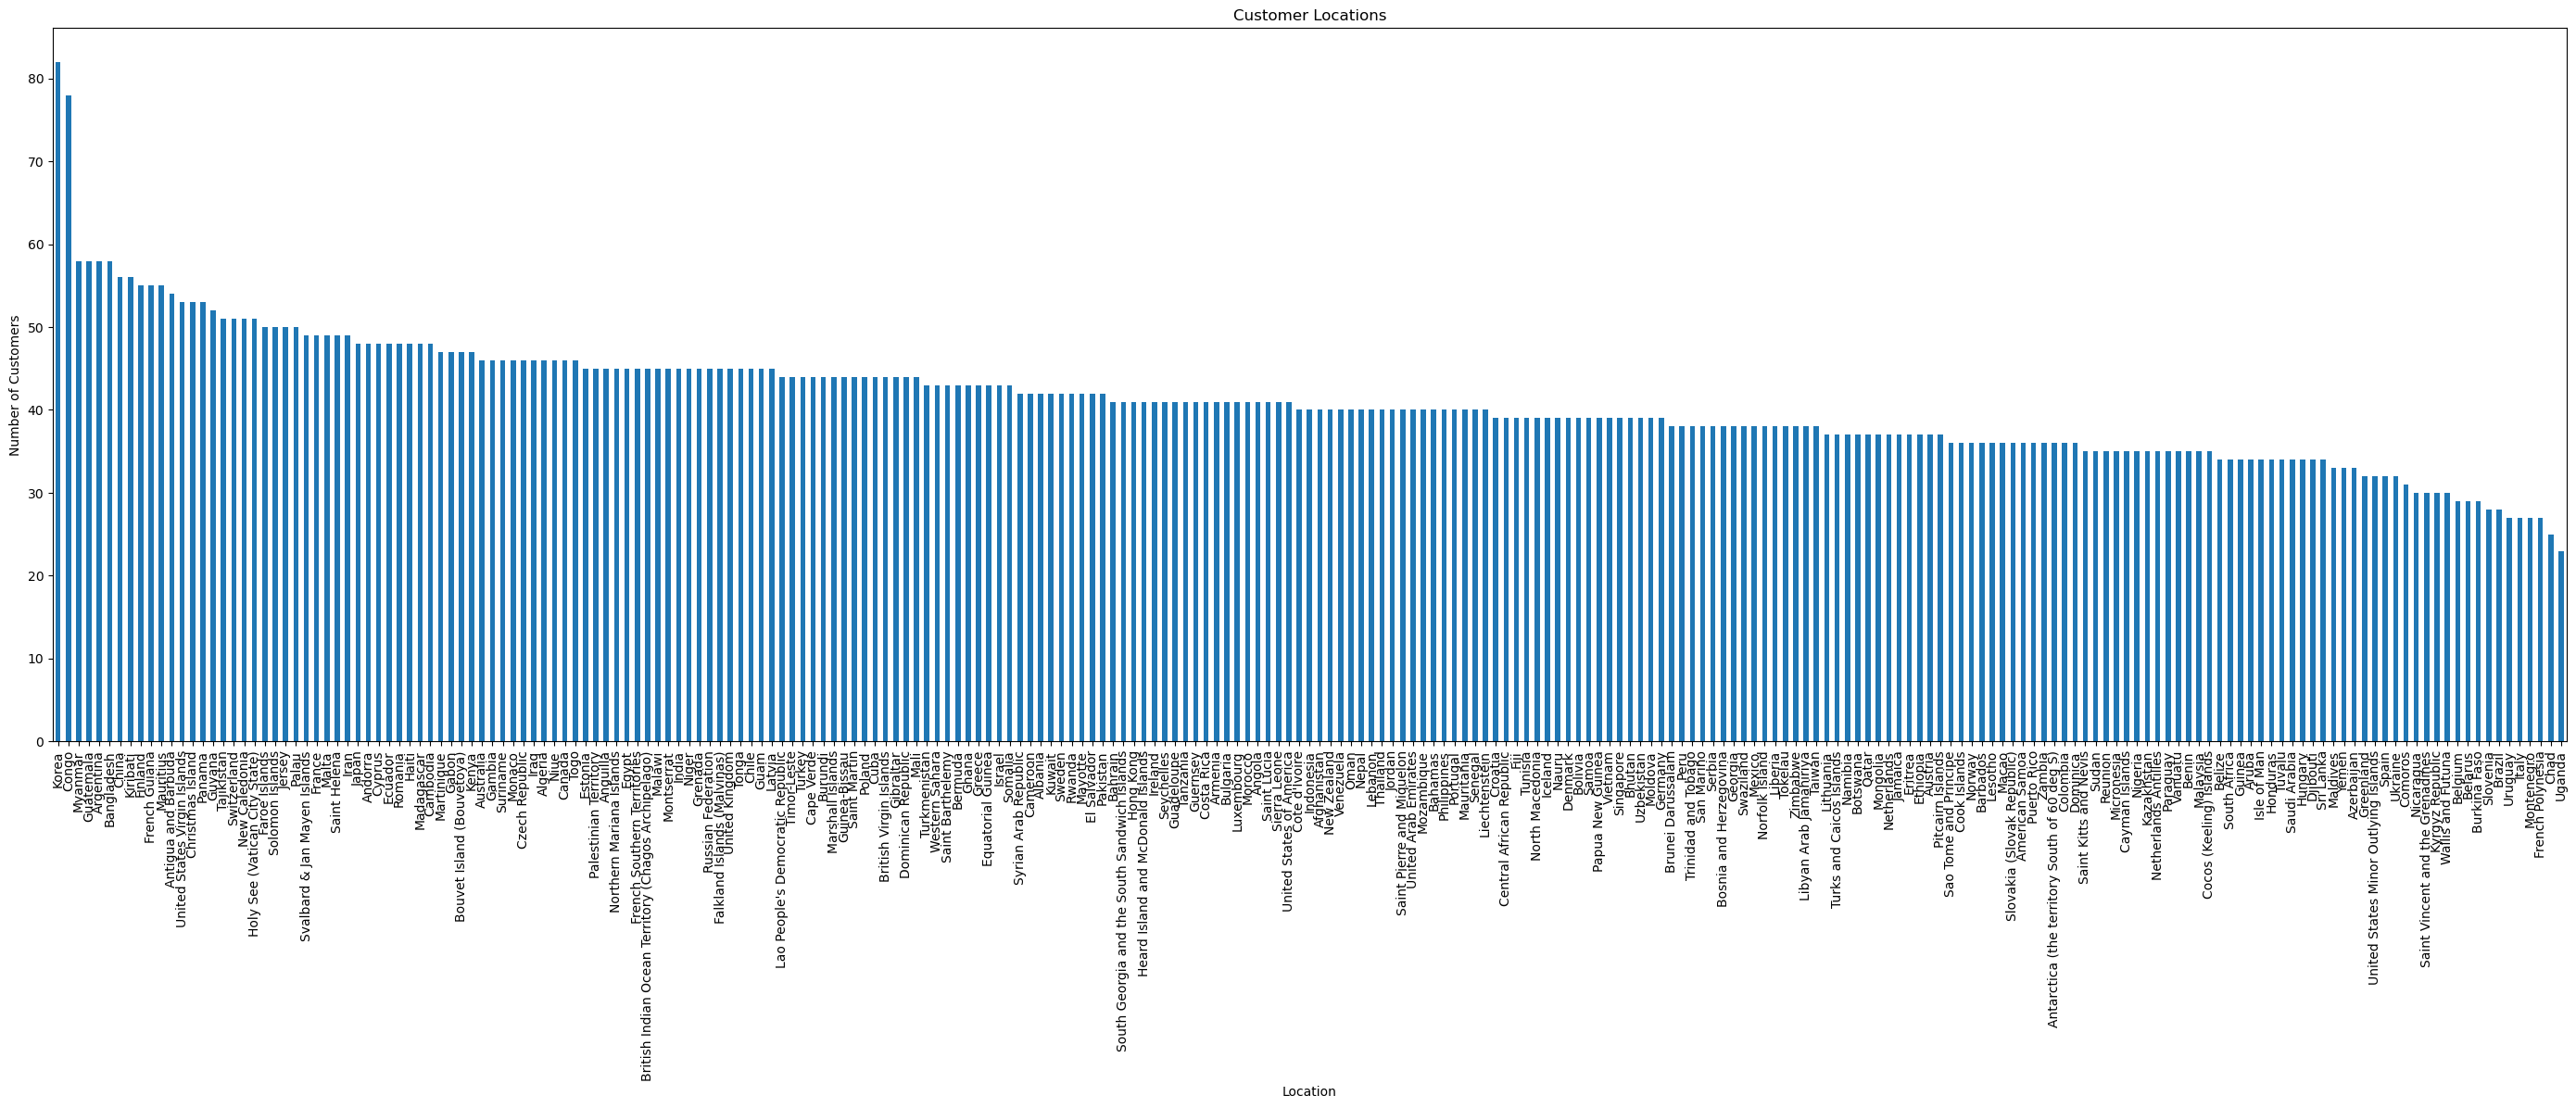

In [ ]:

plt.figure(figsize=(35, 10))  
customer_locations['location'].value_counts().plot(kind='bar')
plt.title('Customer Locations')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.show()


By conducting this location analysis, we can understand where our customers are located and how their location might influence their purchasing behavior.

In [46]:
# Merge location data with order data
location_purchase_data = pd.merge(customer_locations, orders_data, on='customer_id')

# Group by location and analyze purchase patterns
purchase_patterns_by_location = location_purchase_data.groupby('location').agg({
    'order_id': 'count',
    'status': lambda x: x.value_counts().index[0]  # Most common status
}).reset_index()

# Assuming 'product_data' has been merged with 'orders_dataset'
popular_products_by_location = final_merged_data.groupby('location')['name'].agg(lambda x: x.value_counts().index[0])


popular_products_by_location

location
Afghanistan                  Canon EOS R5 Camera
Albania                       Samsung Galaxy S21
Algeria                       Sony PlayStation 5
American Samoa       Samsung 55-Inch 4K Smart TV
Andorra                          Nintendo Switch
                                ...             
Wallis and Futuna                      iPhone 13
Western Sahara        Sony WH-1000XM4 Headphones
Yemen                            Fitbit Charge 4
Zambia                        Sony PlayStation 5
Zimbabwe                         Nintendo Switch
Name: name, Length: 243, dtype: object

The final analysis shows the most purchased product by customers in various locations.This information can be used to tailor marketing campaigns and stock inventory that appeals to customers in different locations.

### c.          Overall Purchase Behavior:

Based on the data provided, what insights can you draw about this customer's overall behavior on the website?

How might these insights inform marketing strategies or personalized recommendations for this customer?



To draw insights about a customer’s overall behavior on the website and inform marketing strategies or personalized recommendations, we will need to analyze the data we've have on their interactions, purchases, and preferences.

We have done this through various methods:




A. We analyzed customers purchase history: A look at the customer’s purchase history will help us understand their buying patterns.


In [35]:
# Calculate the total number of orders and total spend for each customer
purchase_history = final_merged_data.groupby('customer_id').agg({
    'order_id': 'count',
    'price': 'sum'
}).rename(columns={'order_id': 'total_orders', 'price': 'total_spend'})

purchase_history

,total_orders,total_spend
customer_id,,
00096d0c-ced3-4913-afe9-5ce363f7126f,253,218174.55
000c7914-248f-404c-bd49-49c7ae49364e,275,198072.50
000d9458-f109-4fd1-9bc9-2514dde6c7d2,288,235652.16
000e74fd-2f7f-447c-9fe5-a0e856e3e93f,12,12599.88
001c37e2-f25c-45c1-8326-1ddf73c21dde,42,33599.58
...,...,...
ffaf35ad-37fa-43f1-bed3-26bb53e612ae,133,122415.10
ffc51ce7-426f-4e93-b98e-21be2202b40e,200,113718.20
ffda8205-bed4-4067-b4f6-8ed1b4819c64,78,85318.22




B. We identified top product categories: This will help us determine which product categories the customer is most interested in


In [48]:
# 'product_data' has been merged with 'orders_dataset'
top_categories = final_merged_data.groupby(['customer_id', 'name'])['order_id'].count().nlargest(3)

top_categories


customer_id                           name               
eb7dcb88-073d-403e-bdd4-1e5725fe2338  Adidas Ultraboost      31
                                      Canon EOS R5 Camera    31
                                      Coca-Cola 12-Pack      31
Name: order_id, dtype: int64



C. We identified the consumers with the highest purchasing power: This will help us eroll them in a loyalty program


In [39]:
# Assuming 'event_data' contains visit records
visit_frequency = event_data['customer_id'].value_counts()

visit_frequency

customer_id
713fe25b-a6c1-4978-9a56-2a5f711137d1    32
eb7dcb88-073d-403e-bdd4-1e5725fe2338    31
be8ce4e3-c596-43c2-8b70-bdcecada2139    30
f21860ad-07a7-47be-94dd-c255e807fb2b    30
c2b63fa1-3b2d-4299-b390-de9c15f497e1    30
                                        ..
cce6a075-390d-45fe-801a-2f1ad1d849dd     2
67a130d7-db69-488b-8f40-f57a4cf23d3a     2
eeb8213c-ac23-47c9-a3ab-28c7e9d08e67     2
7fda0f4d-2f55-4a81-bf7b-05ebe0be17e7     2
32cb558f-0b41-4a8b-80b2-4c7e38df6c25     2
Name: count, Length: 10000, dtype: int64



D. We assesed time of activity: this will help us identify the times when the customer is most active on the website.



In [51]:


# Convert 'event_timestamp' to a datetime type
event_data['event_timestamp'] = pd.to_datetime(event_data['event_timestamp'], errors='coerce')

# Now you can extract the hour
event_data['hour'] = event_data['event_timestamp'].dt.hour

# And find the peak activity hours
peak_activity_hours = event_data.groupby('hour').size().nlargest(3)

peak_activity_hours

hour
4     132945
14       658
10       655
dtype: int64

Combining all the insights from the steps above will help us get a comprehensive view of the customer’s behavior.

In [54]:
# Combine all insights into a single DataFrame
customer_insights = purchase_history.join(top_categories).join(visit_frequency).join(peak_activity_hours)

customer_insights


ValueError: Other Series must have a name

### 6.0 Conclusion

Based on our Analysis, we gain a deeper understanding of the customer’s behavior and now we can tailor our marketing efforts to their preferences. This personalized approach can lead to increased customer satisfaction and loyalty.